In [1]:
# Import Dependencies
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction
from matplotlib.pyplot import figure



csvpath = os.path.join('..', 'code_output', 'rachels_df.csv')

# Import the rachels_df.csv file as a DataFrame
df_music = pd.read_csv(csvpath, encoding="ISO-8859-1")

print(df_music.head())
print(len(df_music))

   Unnamed: 0  Number of Songs       Artist Name  Artist Location   Duration  \
0           0                1            Casual  California - LA  218.93179   
1           1                1      The Box Tops      Memphis, TN  148.03546   
2           2                1  Sonora Santanera              NaN  177.47546   
3           3                1          Adam Ant  London, England  233.40363   
4           4                1               Gob              NaN  209.60608   

              Title                              Release  Year  Danceability  \
0  I Didn't Mean To                          Fear Itself     0           0.0   
1         Soul Deep                           Dimensions  1969           0.0   
2   Amor De Cabaret  Las Numero 1 De La Sonora Santanera     0           0.0   
3   Something Girls                        Friend Or Foe  1982           0.0   
4    Face the Ashes                        Muertos Vivos  2007           0.0   

   Energy  Mode    Tempo  Loudness   H

In [2]:
df_filtered = df_music[df_music['Hotness'].notnull()]
hotness1 = df_filtered['Hotness']
df_filtered

,Unnamed: 0,Number of Songs,Artist Name,Artist Location,Duration,Title,Release,Year,Danceability,Energy,Mode,Tempo,Loudness,Hotness
0,0,1,Casual,California - LA,218.93179,I Didn't Mean To,Fear Itself,0,0.0,0.0,0,92.198,-11.197,0.602120
4,4,1,Gob,NaN,209.60608,Face the Ashes,Muertos Vivos,2007,0.0,0.0,1,129.738,-4.501,0.604501
8,8,1,Planet P Project,NaN,269.81832,Pink World,Pink World,1984,0.0,0.0,1,86.643,-13.496,0.265861
10,10,1,JennyAnyKind,North Carolina,218.77506,Young Boy Blues,I Need You,0,0.0,0.0,0,146.765,-10.021,0.000000
11,11,1,Wayne Watson,"Wisner, LA",245.21098,The Urgency (LP Version),The Way Home,0,0.0,0.0,1,117.975,-7.545,0.265861
12,12,1,Andy Andy,NaN,226.35057,La Culpa,Placer & Castigo,0,0.0,0.0,1,130.040,-6.632,0.000000
13,13,1,Bob Azzam,NaN,191.84281,Auguri Cha Cha,Arrivederci,0,0.0,0.0,0,137.334,-7.750,0.000000
15,15,1,Blue Rodeo,"Toronto, Ontario, Canada",491.12771,Floating,Outskirts,1987,0.0,0.0,1,119.826,-8.576,0.405116
16,16,1,Richard Souther,United States,228.59710,High Tide,Cross Currents,0,0.0,0.0,1,127.756,-16.110,0.334707
18,18,1,Tesla,NaN,290.29832,Caught In A Dream,Gold,2004,0.0,0.0,1,150.062,-5.271,0.684136


In [3]:
df_total_filtered = df_music.dropna()

indexNames = df_total_filtered[df_total_filtered['Year'] == 0].index
 
df_total_filtered.drop(indexNames , inplace=True)

df_total_filtered

C:\Users\Rachel\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Unnamed: 0,Number of Songs,Artist Name,Artist Location,Duration,Title,Release,Year,Danceability,Energy,Mode,Tempo,Loudness,Hotness
15,15,1,Blue Rodeo,"Toronto, Ontario, Canada",491.12771,Floating,Outskirts,1987,0.0,0.0,1,119.826,-8.576,0.405116
23,23,1,The Dillinger Escape Plan,"Morris Plains, NJ",207.77751,Setting Fire to Sleeping Giants,Miss Machine,2004,0.0,0.0,1,166.862,-4.264,0.666528
24,24,1,SUE THOMPSON,"Nevada, MO",124.86485,James (Hold The Ladder Steady),Sue Thompson - Her Very Best,1985,0.0,0.0,1,137.522,-12.332,0.495294
29,29,1,Faye Adams,"Newark, NJ",156.39465,Crazy Mixed Up World,Shake A Hand,1961,0.0,0.0,1,95.957,-18.051,0.000000
30,30,1,Terry Callier,Chicago,342.56934,Do You Finally Need A Friend,Occasional Rain,1972,0.0,0.0,1,110.189,-11.939,0.413740
32,32,1,The Shangri-Las,"Queens, NY",164.80608,Twist and Shout,Best of The Shangri-Las,1964,0.0,0.0,1,130.100,-10.922,0.443291
33,33,1,Billie Jo Spears,"Beaumont, TX",133.32853,It Makes No Difference Now,20 Of Her Best,1992,0.0,0.0,1,160.839,-9.983,0.000000
40,40,1,Scarlet's Remains,California - LA,198.73914,Spin,The Palest Grey,2007,0.0,0.0,1,115.061,-7.469,0.450992
41,41,1,The Suicide Machines,"Detroit, MI",95.68608,Burning In The Aftermath,A Match & Some Gasoline,2003,0.0,0.0,1,115.887,-2.022,0.528782
44,44,1,Loudon Wainwright III,"Chapel Hill, NC",190.48444,Human Cannonball,Grown Man,1995,0.0,0.0,1,102.428,-15.663,0.510119


In [4]:
# Use numpy to create quartiles
hotness = df_total_filtered['Hotness']

q1 = np.percentile(hotness, 25)
q3 = np.percentile(hotness,75)
# Print the quartiles
print(f"Q1 is {q1}")
print(f"Q3 is {q3}")
# Calculate the interquartile range
iqr = (q3 - q1)
print("interquartile range:", iqr)
# Find lower boundary
# Q1 - 1.5 * IQR
lower_boundary = q1 - (1.5 * iqr)
print("lower boundary:", lower_boundary)
# Find upper boundary
# Q3 + 1.5 * IQR
upper_boundary = q3 + (1.5 * iqr)
print("upper boundary:", upper_boundary)
# Check for any lower outliers
lowcheck = hotness[hotness <= lower_boundary]
print(lowcheck)
# Check for any upper outliers
highcheck = hotness[hotness >= upper_boundary]
print(highcheck)

Q1 is 0.31616795320664537
Q3 is 0.6057651118565015
interquartile range: 0.28959715864985613
lower boundary: -0.11822778476813883
upper boundary: 1.0401608498312858
Series([], Name: Hotness, dtype: float64)
Series([], Name: Hotness, dtype: float64)


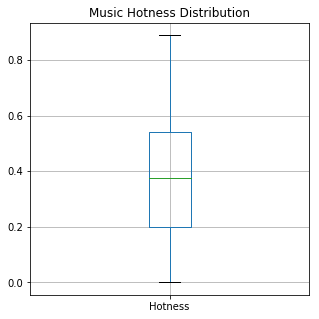

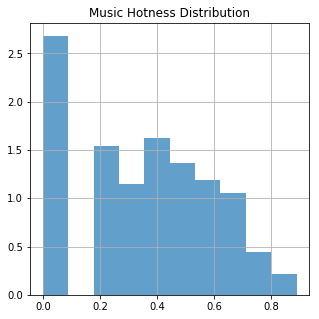

In [19]:
# Create a boxplot to compare areas
hotbox = df_filtered.boxplot("Hotness", figsize=(5, 5))
plt.title('Music Hotness Distribution')

hothist = df_filtered.hist("Hotness", density=True, alpha=.7, figsize=(5,5))
plt.title('Music Hotness Distribution')
plt.show()

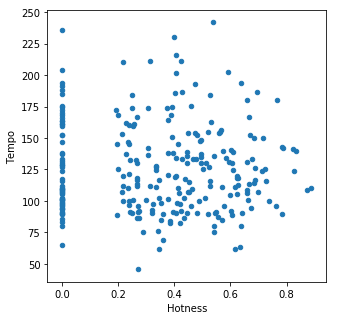

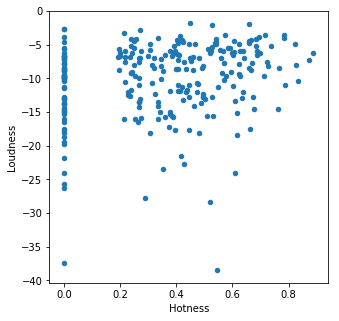

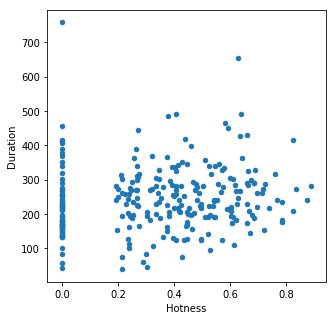

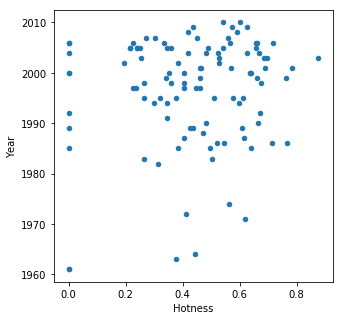

In [27]:
# Create a boxplot to compare areas
df_filtered.plot.scatter("Hotness", "Tempo", figsize=(5, 5))

df_filtered.plot.scatter("Hotness", "Loudness", figsize=(5, 5))

df_filtered.plot.scatter("Hotness", "Duration", figsize=(5, 5))

df_total_filtered.plot.scatter("Hotness", "Year", figsize=(5, 5))